# Sales Data Analysis

### Load Data

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import logging

In [50]:
logging.info('Load Training Set')

In [51]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_column', None)
df_train = pd.read_csv('../data/train.csv', na_values=['?', None, 'undefined'])
df_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [52]:
logging.info('Load Test Set')

In [53]:
df_test = pd.read_csv('../data/test.csv', na_values=['?', None, 'undefined'])
df_test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [54]:
logging.info('Load Store Info')

In [4]:
df_store = pd.read_csv('../data/store.csv', na_values=['?', None, 'undefined'])
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [5]:
df_train["Date"]=pd.to_datetime(df_train["Date"], format='%Y/%m/%d', errors='coerce')
df_test["Date"]=pd.to_datetime(df_test["Date"], format='%Y/%m/%d', errors='coerce')

def holiday(x):
    if x in ['a','b','c']:
        return 1
    return 0
    
def day_month_year(df, col):
    try:
        df['Day'] = pd.DatetimeIndex(df[col]).day
        df['Month'] = pd.DatetimeIndex(df[col]).month
        df['Year'] = pd.DatetimeIndex(df[col]).year
    except KeyError:
        print("Unknown Column Index")
    
df_train['Holiday'] = df_train['StateHoliday'].apply(holiday)
df_test['Holiday'] = df_test['StateHoliday'].apply(holiday)

df_train['Holiday'] = df_train['Holiday'] | df_train['SchoolHoliday']
df_test['Holiday'] = df_test['Holiday'] | df_test['SchoolHoliday']

day_month_year(df_train, 'Date')
day_month_year(df_test, 'Date')

### Shapes

In [6]:
print(f" There are {df_train.shape[0]} rows and {df_train.shape[1]} columns")

 There are 1017209 rows and 13 columns


In [7]:
print(f" There are {df_test.shape[0]} rows and {df_test.shape[1]} columns")

 There are 41088 rows and 12 columns


### Missing Values

In [8]:
# how many missing values exist or better still what is the % of missing values in the dataset?
def percent_missing(df):

    # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

percent_missing(df_train)
percent_missing(df_test)

The dataset contains 0.0 % missing values.
The dataset contains 0.0 % missing values.


In [9]:
df_test = df_test.dropna()

In [10]:
print("Mising Train Data")
df_train.isna().sum()

Mising Train Data


Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
Holiday          0
Day              0
Month            0
Year             0
dtype: int64

In [11]:
print("Mising Test Data")
df_test.isna().sum()

Mising Test Data


Id               0
Store            0
DayOfWeek        0
Date             0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
Holiday          0
Day              0
Month            0
Year             0
dtype: int64

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 13 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
 9   Holiday        1017209 non-null  int64         
 10  Day            1017209 non-null  int64         
 11  Month          1017209 non-null  int64         
 12  Year           1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(11), object(1)
memory usage: 100.9+ MB


In [13]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41077 entries, 0 to 41087
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             41077 non-null  int64         
 1   Store          41077 non-null  int64         
 2   DayOfWeek      41077 non-null  int64         
 3   Date           41077 non-null  datetime64[ns]
 4   Open           41077 non-null  float64       
 5   Promo          41077 non-null  int64         
 6   StateHoliday   41077 non-null  object        
 7   SchoolHoliday  41077 non-null  int64         
 8   Holiday        41077 non-null  int64         
 9   Day            41077 non-null  int64         
 10  Month          41077 non-null  int64         
 11  Year           41077 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(9), object(1)
memory usage: 4.1+ MB


In [47]:
# df_train.to_csv('../data/train_clean.csv', index = False)
# df_test.to_csv('../data/test_clean.csv', index = False)

### Non Graphical Univariate Analysis

In [14]:
print("Training Set")
df_train.describe()

Training Set


,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Holiday,Day,Month,Year
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,1.939228e-01,1.570279e+01,5.846762e+00,2.013832e+03
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,3.953693e-01,8.787638e+00,3.326097e+00,7.773960e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.013000e+03
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.000000e+00,3.000000e+00,2.013000e+03
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.600000e+01,6.000000e+00,2.014000e+03
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.300000e+01,8.000000e+00,2.014000e+03
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.100000e+01,1.200000e+01,2.015000e+03


In [15]:
print("Test Set")
df_test.describe()

Test Set


,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday,Holiday,Day,Month,Year
count,41077.000000,41077.000000,41077.000000,41077.000000,41077.000000,41077.000000,41077.000000,41077.000000,41077.000000,41077.0
mean,20548.560216,555.881832,3.979331,0.854322,0.395842,0.443606,0.447988,13.521435,8.353994,2015.0
std,11860.106172,320.315550,2.015529,0.352787,0.489037,0.496816,0.497293,8.449282,0.478213,0.0
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,8.000000,2015.0
25%,10280.000000,279.000000,2.000000,1.000000,0.000000,0.000000,0.000000,6.000000,8.000000,2015.0
50%,20550.000000,553.000000,4.000000,1.000000,0.000000,0.000000,0.000000,13.000000,8.000000,2015.0
75%,30819.000000,833.000000,6.000000,1.000000,1.000000,1.000000,1.000000,20.000000,9.000000,2015.0
max,41088.000000,1115.000000,7.000000,1.000000,1.000000,1.000000,1.000000,31.000000,9.000000,2015.0


### Graphical Univariate Analysis

#### Fix Outliers

In [16]:
# def format_float(value):
#     return f'{value:,.2f}'

# def fix_outlier(df, column_list):
#     for column in column_list:
#         df = df[(df[column] < df[column].quantile(0.98)) & (df[column] > df[column].quantile(0.02))]
    
#     return df
# df = fix_outlier(df_train, ['Sales', 'Customers'])
# pd.options.display.float_format = format_float

In [17]:
###################################PLOTTING FUNCTIONS###################################

def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    # plt.figure(figsize=(15, 10))
    # fig, ax = plt.subplots(1, figsize=(12, 7))
    sns.displot(data=df, x=column, color=color, bins = 50, kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

def plot_count(df:pd.DataFrame, column:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

def plot_pie(df:pd.DataFrame, column:str, labels:list, title:str) -> None:
    df = df[[column]]
    sizes = [len(df[df[column] == val]) for val in set(df[column])]
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    plt.title(title, size=15, fontweight='bold')
    ax1.axis('equal')
    plt.show()

def plot_bar(df:pd.DataFrame, x_col:str, y_col:str, title:str, xlabel:str, ylabel:str)->None:
    plt.figure(figsize=(12, 7))
    sns.barplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.show()

def plot_heatmap(df:pd.DataFrame, title:str, cbar=False)->None:
    plt.figure(figsize=(12, 7))
    sns.heatmap(df, annot=True, cmap='viridis', vmin=0, vmax=1, fmt='.2f', linewidths=.7, cbar=cbar )
    plt.title(title, size=18, fontweight='bold')
    plt.show()
    
def plot_monthly_sales(df, month, year, title):
    monthly_data = df_train[(df_train['Month'] == month) & (df_train['Year'] == year)][['Day','Sales']].groupby('Day').mean().reset_index()
    plot_bar(monthly_data, 'Day', 'Sales', title, 'Day', 'Sales')
    

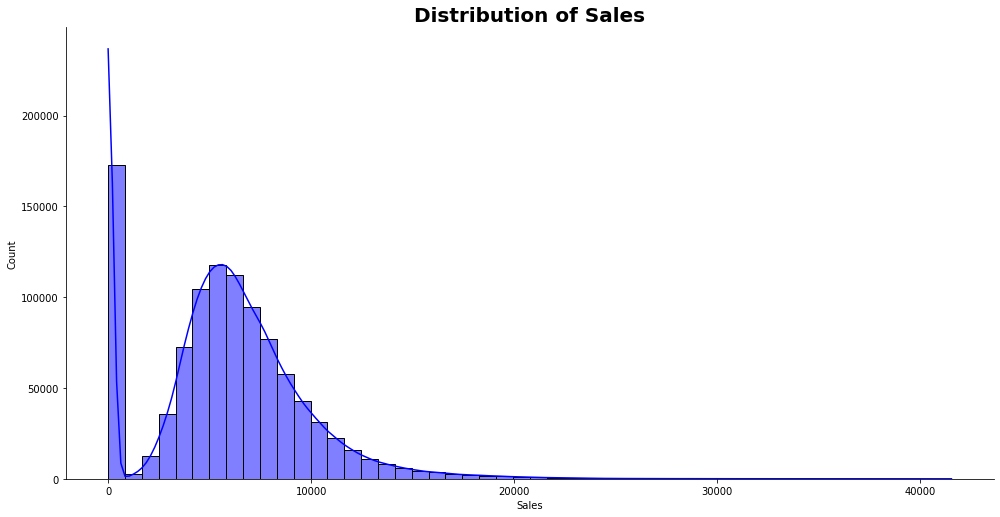

In [18]:
plot_hist(df_train, 'Sales', 'blue')

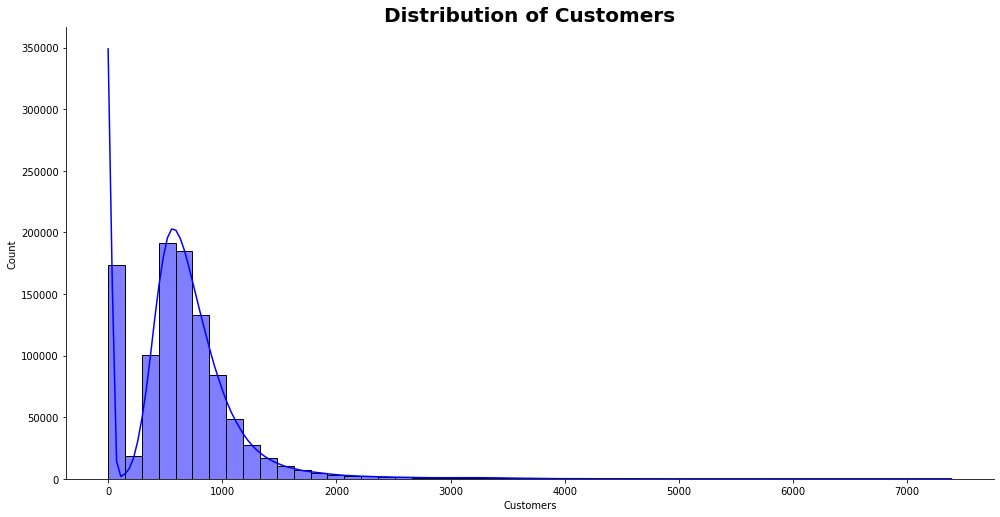

In [19]:
plot_hist(df_train, 'Customers', 'blue')

#### plot of the distribution of promotions per dataset

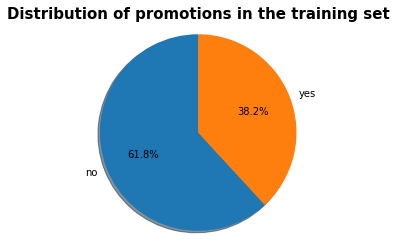

In [20]:
plot_pie(df_train, 'Promo', ['no', 'yes'], "Distribution of promotions in the training set")

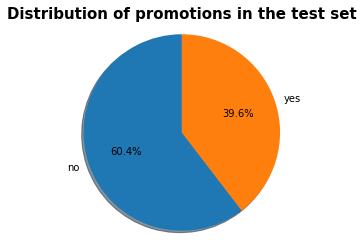

In [21]:
plot_pie(df_test, 'Promo', ['no', 'yes'], "Distribution of promotions in the test set")

#### Distrubitions of Sales per Holiday

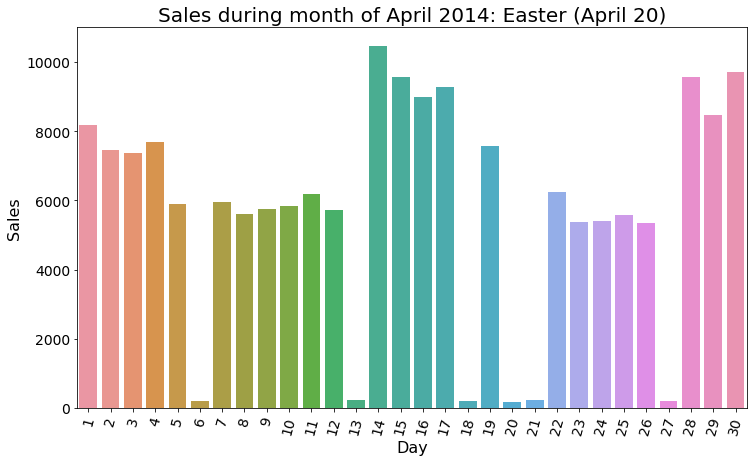

In [22]:
plot_monthly_sales(df_train, 4, 2014, 'Sales during month of April 2014: Easter (April 20)')

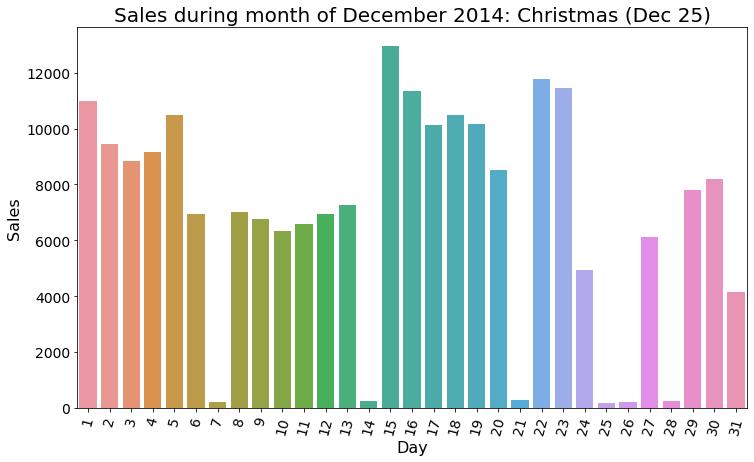

In [23]:
plot_monthly_sales(df_train, 12, 2014, 'Sales during month of December 2014: Christmas (Dec 25)')

### Average Sales During the remaining months

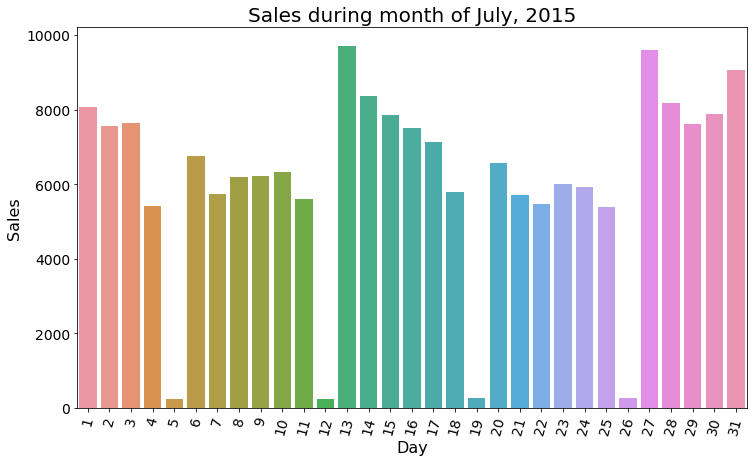

In [24]:
plot_monthly_sales(df_train, 7, 2015, 'Sales during month of July, 2015')

In [25]:
df_train[['Promo', 'Customers','Sales']].corr()

,Promo,Customers,Sales
Promo,1.000000,0.316169,0.452345
Customers,0.316169,1.000000,0.894711
Sales,0.452345,0.894711,1.000000


#### Correlations between Sales and number of customers

In [26]:
df_train[['Customers','Sales']].corr()

,Customers,Sales
Customers,1.000000,0.894711
Sales,0.894711,1.000000


#### How does promo affect sales? Are the promos attracting more customers? How does it affect already existing customers?

In [27]:
#Correlation between promo and sales
df_train[['Promo','Sales']].corr()

,Promo,Sales
Promo,1.000000,0.452345
Sales,0.452345,1.000000


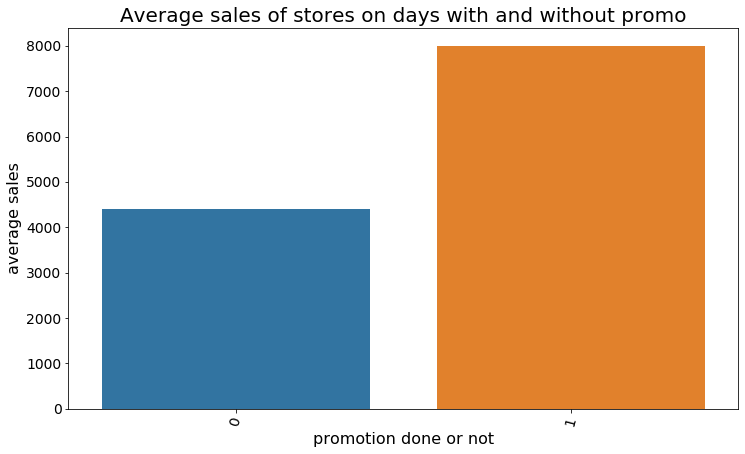

In [28]:
plot_bar(df_train[['Promo','Sales']].groupby('Promo').mean().reset_index(), 'Promo', 'Sales', 'Average sales of stores on days with and without promo', 'promotion done or not', 'average sales')


In [29]:
df_train[['Promo','Customers']].groupby('Promo').mean().reset_index()

,Promo,Customers
0,0,517.823542
1,1,820.098815


In [30]:
820.098815/517.823542

1.5837418511960972

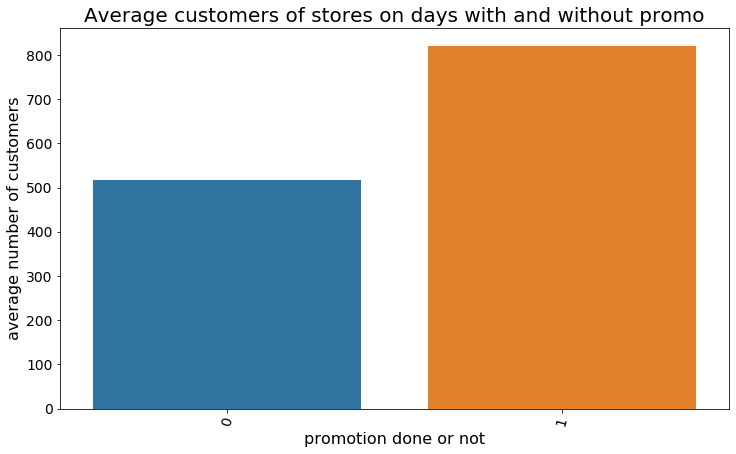

In [31]:
plot_bar(df_train[['Promo','Customers']].groupby('Promo').mean().reset_index(), 'Promo', 'Customers', 'Average customers of stores on days with and without promo', 'promotion done or not', 'average number of customers')

Existing customers return to buy more

#### Could the promos be deployed in more effective ways? Which stores should promos be deployed in?


In [32]:
df_promo = df_train[['Store', 'Promo', 'Sales']].groupby('Store').mean().sort_values(['Sales'], ascending=True).reset_index()
df_promo.describe()

,Store,Promo,Sales
count,1115.00000,1115.000000,1115.000000
mean,558.00000,0.381382,5763.320541
std,322.01708,0.001788,2046.447377
min,1.00000,0.377309,2244.503185
25%,279.50000,0.382166,4412.415567
50%,558.00000,0.382166,5459.185775
75%,836.50000,0.382166,6633.871550
max,1115.00000,0.382572,20718.515924


In [33]:
df_promo.head()

,Store,Promo,Sales
0,307,0.382166,2244.503185
1,543,0.382166,2313.468153
2,198,0.382166,2407.933121
3,208,0.382166,2443.791932
4,841,0.382166,2461.395966


Percentage of days with promo seems to be almost the same for every store. It has a standard deviation of **0.001788**

In [34]:
df_promo['Sales'].quantile(0.15)

3985.052016985138

In [35]:
df_more_promos = df_promo[df_promo['Sales'] < df_promo['Sales'].quantile(0.20)]
df_more_promos.head()

,Store,Promo,Sales
0,307,0.382166,2244.503185
1,543,0.382166,2313.468153
2,198,0.382166,2407.933121
3,208,0.382166,2443.791932
4,841,0.382166,2461.395966


The lowest **20%** earning stores are stored in **df_more_promos**. These stores should get more promos to boost their sales.

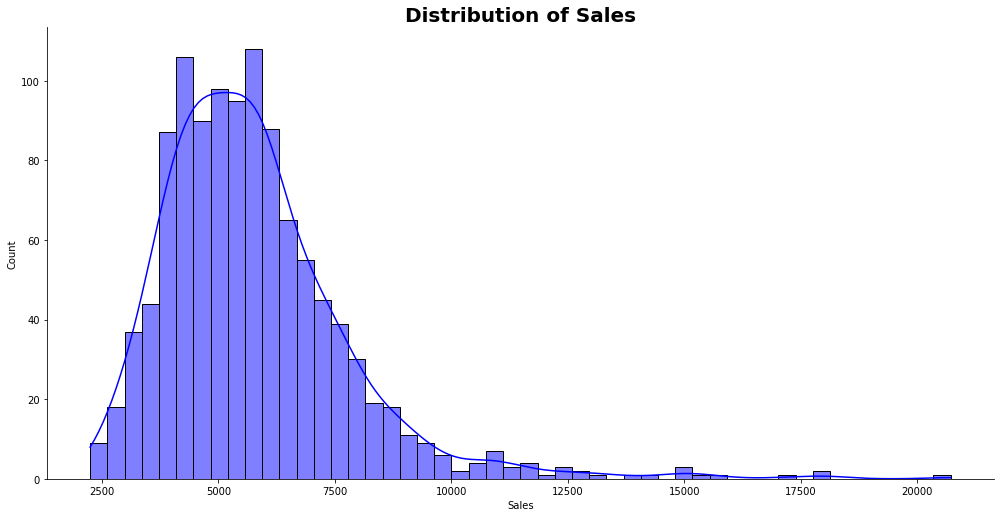

In [36]:
plot_hist(df_promo, 'Sales', 'blue')

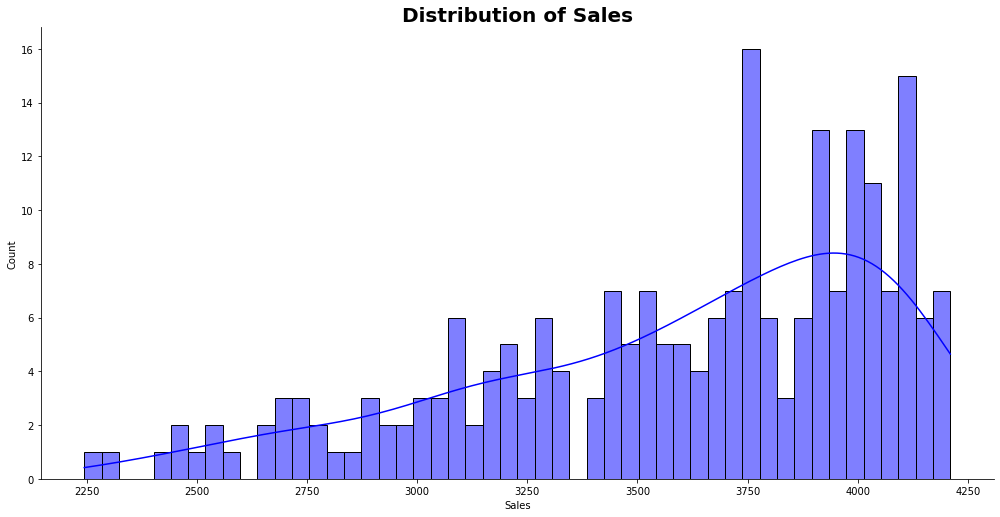

In [37]:
plot_hist(df_more_promos, 'Sales', 'blue')

### Trends of customer behavior during store open and closing times

### Which stores are opened on all weekdays? How does that affect their sales on weekends? 

In [38]:
df_weekends = df_train[['Store', 'DayOfWeek','Open', 'Sales','Customers']]
df_weekends = df_weekends[df_weekends['Open'] == 1]
weekend_stores = df_weekends[['Store', 'DayOfWeek']].groupby('Store').nunique()
weekend_stores = weekend_stores[weekend_stores['DayOfWeek'] == 7].reset_index()
len(weekend_stores)

33

In [39]:
df_weekends = df_weekends[df_weekends['Store'].isin(set(weekend_stores['Store']))]
df_weekends.sample(10)

,Store,DayOfWeek,Open,Sales,Customers
35431,867,2,1,5822,448
984094,335,3,1,12944,2637
254525,453,5,1,6255,651
198743,274,2,1,3923,930
50736,562,2,1,19034,3021
764189,85,4,1,7106,983
28973,1099,1,1,9593,1277
594977,353,2,1,4949,1361
900587,453,1,1,4643,644
775986,732,1,1,11031,1182


In [40]:
df_weekends[['DayOfWeek','Sales','Customers']].groupby('DayOfWeek').mean()

,Sales,Customers
DayOfWeek,,
1,9488.192281,1500.155984
2,8578.175166,1408.565058
3,8381.013822,1396.282654
4,8481.132578,1425.587228
5,8865.035019,1507.744434
6,7019.393439,1213.064923
7,8224.723908,1441.532424


Average sale on Sunday exceeds the average sale on saturday.

### Check how the assortment type affects sales

In [41]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [42]:
df_store.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [43]:
avg_sales = df_train[['Store','Sales']].groupby('Store').mean()
assortment_sales = avg_sales.join(df_store[['Store', 'Assortment']].set_index('Store'), on = 'Store')
assortment_sales.groupby('Assortment').mean()

,Sales
Assortment,
a,5468.451697
b,8485.838783
c,6056.409352


Average sales varies per Assortment type. **a = basic, b = extra, c = extended**. Stores with extra assortment levels have higher average turnover (earning)

### How does the distance to the next competitor affect sales? What if the store and its competitors all happen to be in city centres, does the distance matter in that case?

In [44]:
avg_sales = df_train[['Store','Sales']].groupby('Store').mean()
comp_dist_sales = avg_sales.join(df_store[['Store', 'CompetitionDistance']].set_index('Store'), on = 'Store')
comp_dist_sales.sample(5)

,Sales,CompetitionDistance
Store,,
844,3455.644374,2030.0
1082,5833.263270,440.0
16,6335.340764,3270.0
653,4891.908705,7520.0
492,6366.098945,1740.0


In [45]:
comp_dist_sales['quintile_rank'] = pd.qcut(comp_dist_sales['CompetitionDistance'], 5, labels = False)
comp_dist_sales[['Sales','quintile_rank']].groupby('quintile_rank').mean()

,Sales
quintile_rank,
0.0,6269.619644
1.0,5694.362991
2.0,5562.135189
3.0,5621.225213
4.0,5676.532124


The Distance to the next competitor is does not affect sales by much. In fact, the stores with the closest competitor have average higher sales earnings.

### How does the opening or reopening of new competitors affect stores? Check for stores with NA as competitor distance but later on has values for competitor distance

### 